In [51]:
import numpy as np
import matplotlib.pyplot as plt
import fractions as frac
import pandas as pd

In [62]:
def cmp_fun(k):
    return (4**(-k))/3

In [17]:
def x_n(n: int, x0, x1, type):
    x = np.zeros(n, dtype=type)
    x[0] = x0
    x[1] = x1

    for i in range(2,n):
        x[i] = 2.25*x[i-1] - 0.5*x[i-2]
    
    return x

In [23]:
ys_float_32 = x_n(225,1/3,1/12,np.float32)

In [22]:
ys_float_64 = x_n(60,1/3,1/12,np.float64)

In [21]:
ys_fraction = x_n(225,1/3,1/12,frac.Fraction)

In [33]:
ys_cmp225 = np.array([cmp_fun(i) for i in range(225)])
ys_cmp60 = np.array([cmp_fun(i) for i in range(60)])

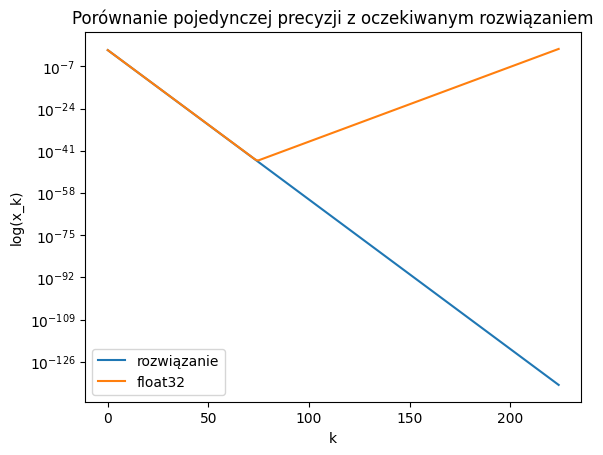

In [47]:
xs = np.arange(0,225)
plt.semilogy(xs,ys_cmp225,label="rozwiązanie")
plt.semilogy(xs,ys_float_32,label="float32")
plt.legend()
plt.title("Porównanie pojedynczej precyzji z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel(r'log(x_k)')
plt.show()

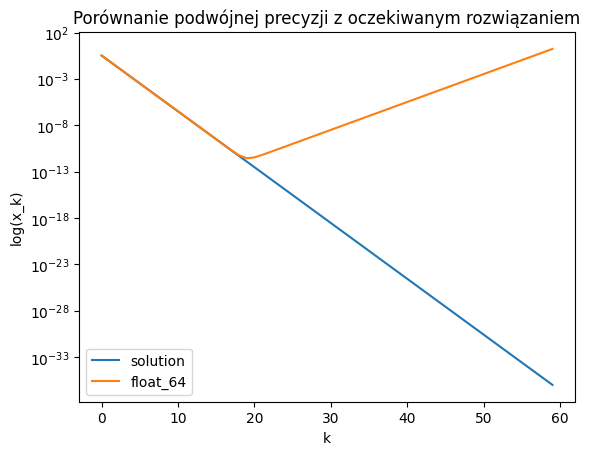

In [48]:
xs = np.arange(0,60)
plt.semilogy(xs,ys_cmp60, label="solution")
plt.semilogy(xs,ys_float_64, label="float_64")
plt.title("Porównanie podwójnej precyzji z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel("log(x_k)")
plt.legend()
plt.show()

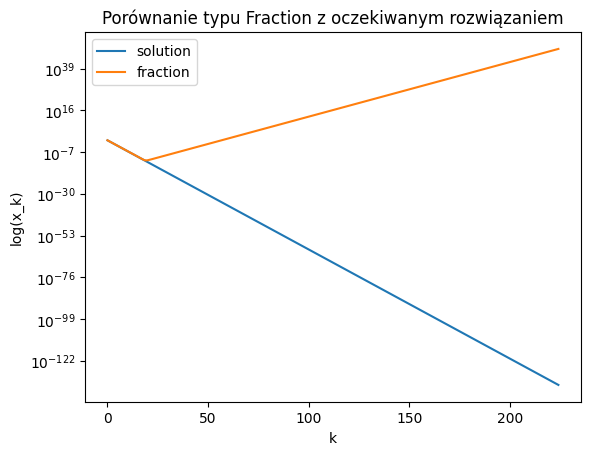

In [49]:
xs = np.arange(0,225)
plt.semilogy(xs,ys_cmp225, label="solution")
plt.semilogy(xs,ys_fraction, label="fraction")
plt.title("Porównanie typu Fraction z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel("log(x_k)")
plt.legend()
plt.show()

In [60]:
df225 = pd.DataFrame()
df225["float32"] = ys_float_32
df225["fraction"] = ys_fraction
df225["solution"] = ys_cmp225
df225["error float32"] = abs(ys_float_32 - ys_cmp225)
df225["error fraction"] = abs(ys_fraction - ys_cmp225)
df225 = df225.rename_axis('k', axis='columns')
df225

k,float32,fraction,solution,error float32,error fraction
0,0.333333,0.333333,3.333333e-01,9.934107e-09,0.0
1,0.083333,0.083333,8.333333e-02,2.483527e-09,0.0
2,0.020833,0.020833,2.083333e-02,6.208817e-10,0.0
3,0.005208,0.005208,5.208333e-03,1.552204e-10,0.0
4,0.001302,0.001302,1.302083e-03,3.880511e-11,0.0
...,...,...,...,...,...
220,0.062500,5010862756563094792359623259522322401231709929...,1.174034e-133,6.250000e-02,5010862756563094792359623259522322401231709929...
221,0.125000,1002172551312618958471924651904464480246341985...,2.935085e-134,1.250000e-01,1002172551312618958471924651904464480246341985...
222,0.250000,2004345102625237916943849303808928960492683971...,7.337712e-135,2.500000e-01,2004345102625237916943849303808928960492683971...
223,0.500000,4008690205250475833887698607617857920985367943...,1.834428e-135,5.000000e-01,4008690205250475833887698607617857920985367943...


In [64]:
df60 = pd.DataFrame()
df60["float64"] = ys_float_64
df60["solution"] = ys_cmp60
df60['error float64'] = abs(ys_float_64-ys_cmp60)
df60 = df60.rename_axis('k', axis='columns')
df60

1.714285714285714


k,float64,solution,error float64
0,3.333333e-01,3.333333e-01,0.000000e+00
1,8.333333e-02,8.333333e-02,0.000000e+00
2,2.083333e-02,2.083333e-02,1.040834e-17
3,5.208333e-03,5.208333e-03,2.341877e-17
4,1.302083e-03,1.302083e-03,4.748806e-17
5,3.255208e-04,3.255208e-04,9.513874e-17
6,8.138021e-05,8.138021e-05,1.903181e-16
7,2.034505e-05,2.034505e-05,3.806464e-16
8,5.086263e-06,5.086263e-06,7.612954e-16
9,1.271566e-06,1.271566e-06,1.522591e-15
